In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Model
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
#from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
import numpy as np
from IPython.display import Image
from tensorflow.keras.optimizers import Adam

# Accessing My Google Drive
drive.mount('/content/drive')  # access my drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Keras is an open-source library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library. ... Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()
import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
target_size=(256,256) #provided by network resizing

In [ ]:
#bast5dm el swar 3shan a3mlha zoom in w out w rescale 3shan a5od mnha kol el positions 
#ll validation w el training
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#ba2sm el swar w b7dd el directory bt3o w b7dd el batch size 

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Multimedia project',
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Multimedia project', # same directory as training data
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 100 images belonging to 12 classes.
Found 21 images belonging to 12 classes.


In [ ]:
train_generator.image_shape # bcheck 3la el shape

(256, 256, 3)

In [ ]:
train_generator.class_indices #bcheck 3la el classes el training

{'10 back': 0,
 '10 front': 1,
 '100 back': 2,
 '100 front': 3,
 '20 back': 4,
 '20 front': 5,
 '200 back': 6,
 '200 front': 7,
 '5 back': 8,
 '5 front': 9,
 '50 back': 10,
 '50 front': 11}

In [ ]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(256,256,3)),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dense(64,activation='relu'),
   tf.keras.layers.Dropout(rate=0.5),
   tf.keras.layers.Dense(12, activation='softmax')
])

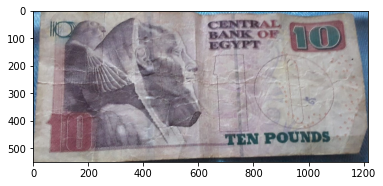

In [ ]:
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/Multimedia project/10 back/10.1.jpg')
plt.imshow(img1)
#preprocess image
img1 = image.load_img('/content/drive/MyDrive/Multimedia project/10 back/10.1.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
# EPOCHS = 20
EPOCHS = 250
INIT_LR = 1e-3
BS = 32

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)            

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        #callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)],
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/250
3/3 [==============================] - 8s 3s/step - loss: 0.2585 - accuracy: 0.3484
Epoch 2/250
3/3 [==============================] - 4s 2s/step - loss: 0.1816 - accuracy: 0.6340
Epoch 3/250
3/3 [==============================] - 6s 2s/step - loss: 0.2194 - accuracy: 0.5078
Epoch 4/250
3/3 [==============================] - 6s 2s/step - loss: 0.2361 - accuracy: 0.3659
Epoch 5/250
3/3 [==============================] - 4s 2s/step - loss: 0.1991 - accuracy: 0.5135
Epoch 6/250
3/3 [==============================] - 4s 1s/step - loss: 0.1899 - accuracy: 0.5727
Epoch 7/250
3/3 [==============================] - 4s 1s/step - loss: 0.2148 - accuracy: 0.5004
Epoch 8/250
3/3 [==============================] - 4s 1s/step - loss: 0.1950 - accuracy: 0.5295
Epoch 9/250
3/3 [==============================] - 4s 1s/step - loss: 0.1795 - accuracy: 0.5680
Epoch 10/250
3/3 [==============================] - 4s 1s/step - loss: 0.1725 - accuracy: 0.6213
Epoch 11/250
3/3 [=====================

dict_keys(['loss', 'accuracy'])
{'loss': [0.2855725884437561, 0.20629793405532837, 0.22120797634124756, 0.22094400227069855, 0.1947937309741974, 0.17950770258903503, 0.20862704515457153, 0.19681233167648315, 0.179698184132576, 0.1725693643093109, 0.1825849562883377, 0.14357858896255493, 0.16949984431266785, 0.1671362668275833, 0.17844852805137634, 0.14742515981197357, 0.14514584839344025, 0.16452649235725403, 0.1612728387117386, 0.17034505307674408, 0.14890119433403015, 0.15138696134090424, 0.15179486572742462, 0.14216066896915436, 0.14499709010124207, 0.14042238891124725, 0.13549470901489258, 0.13586311042308807, 0.15665383636951447, 0.1435929536819458, 0.14229653775691986, 0.10934969037771225, 0.13732203841209412, 0.1131662130355835, 0.12606436014175415, 0.13739760220050812, 0.11967452615499496, 0.1361769586801529, 0.12866514921188354, 0.13053341209888458, 0.11767321825027466, 0.10487277060747147, 0.09718658030033112, 0.11532048881053925, 0.10051270574331284, 0.08012234419584274, 0.0

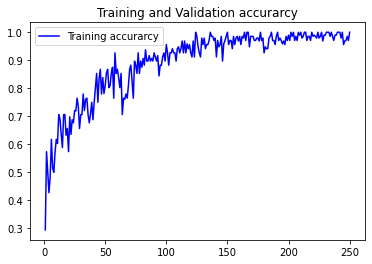

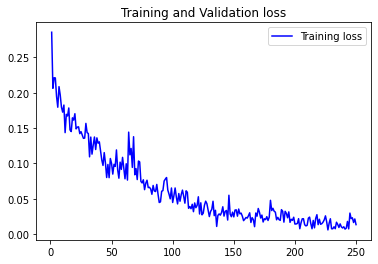

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

accuracy = history.history['accuracy']
print(history.history)
# val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
# plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model.save('money.h5')

In [ ]:
model.save_weights('coins.h5')

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "/content/drive/MyDrive/Multimedia project/")

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

{'10 back': 0,
 '10 front': 1,
 '100 back': 2,
 '100 front': 3,
 '20 back': 4,
 '20 front': 5,
 '200 back': 6,
 '200 front': 7,
 '5 back': 8,
 '5 front': 9,
 '50 back': 10,
 '50 front': 11}

In [ ]:
Classes = ["10 Back","10 Front","100 Back","100 Front","20 Back","20 Front","200 Back","200 Front","5 Back","5 Front","50 Back","50 Front"]

10 Back


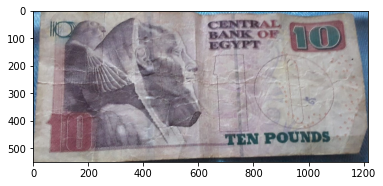

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Pre-Processing test data same as train data.
img_width=256
img_height=256


def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)


result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/10 back/10.1.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/10 back/10.1.jpg')
plt.imshow(coin)
print (Classes[int(result)])

20 Front


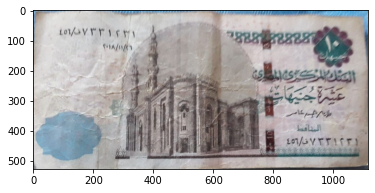

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/10 front/10.0.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/10 front/10.0.jpg')
plt.imshow(coin)
print (Classes[int(result)])

100 Back


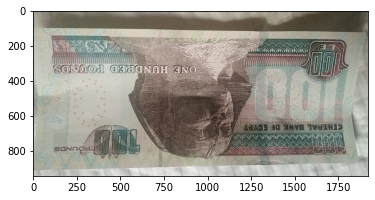

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/100 back/100.3.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/100 back/100.3.jpg')
plt.imshow(coin)
print (Classes[int(result)])

100 Front


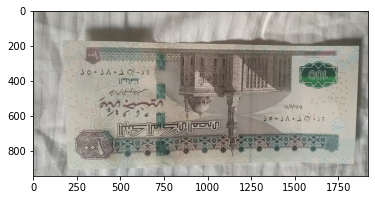

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/100 front/100.2.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/100 front/100.2.jpg')
plt.imshow(coin)
print (Classes[int(result)])

20 Back


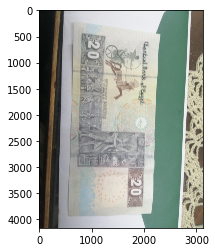

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/20 back/20 back.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/20 back/20 back.jpg')
plt.imshow(coin)
print (Classes[int(result)])

20 Front


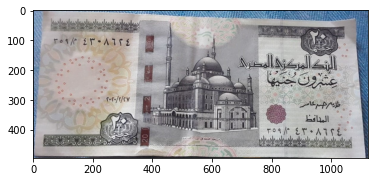

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/20 front/20.0.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/20 front/20.0.jpg')
plt.imshow(coin)
print (Classes[int(result)])

200 Back


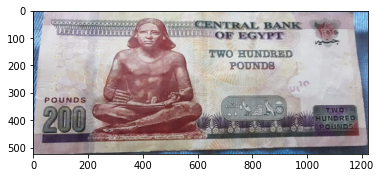

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/200 back/200.1.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/200 back/200.1.jpg')
plt.imshow(coin)
print (Classes[int(result)])

200 Front


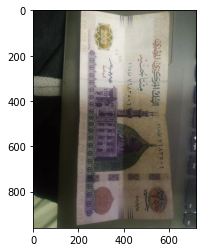

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/200 front/200.3.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/200 front/200.3.jpg')
plt.imshow(coin)
print (Classes[int(result)])

5 Back


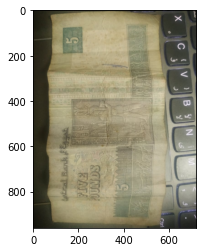

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/5 back/5.0.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/5 back/5.0.jpg')
plt.imshow(coin)
print (Classes[int(result)])

5 Front


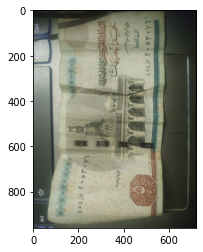

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/5 front/5.1.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/5 front/5.1.jpg')
plt.imshow(coin)
print (Classes[int(result)])

50 Back


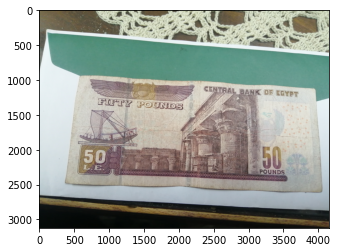

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/50 back/50 back.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/50 back/50 back.jpg')
plt.imshow(coin)
print (Classes[int(result)])

50 Front


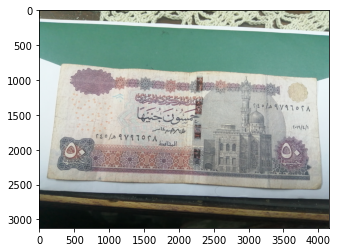

In [ ]:
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/Multimedia project/50 front/50 front.jpg')]),axis=-1)
coin=image.load_img('/content/drive/MyDrive/Multimedia project/50 front/50 front.jpg')
plt.imshow(coin)
print (Classes[int(result)])